## 1. Data Exploration

This section primarily deals with reading in the dataset and visualising them through descriptive statistics, various histograms, scatter and correlation matrices  


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the wine quality dataset
data = pd.read_csv("winequality-red.csv")

# Display the first record
display(data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1.1 Descriptive Statistics

Provide the statistical figures of the original dataset of all 12 columns

In [2]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 1.2  Analysis of Output Quality Figures

A histogram would be generated here for visualisation purposes, as well as the printing of row counts summary figures, for the purposes of data exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000194BEEB0780>]],
      dtype=object)

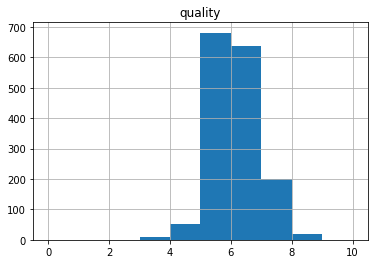

In [3]:
# Histogram Plots of Dataset's Quality Column
data[['quality']].hist(column='quality', bins=np.arange(0,11))

In [4]:
# Total number of records
rec = len(data.index)

# Number of "good" red wine where quality figure is greater or equal to 7
good_wine = sum(data['quality'] >= 7)

# Number of "bad" red wine where quality figure is below 7
bad_wine =  sum(data['quality'] < 7)

# Percentage of wines whose quality figure is above 7
good_wine_prop = 100 * good_wine / rec

# Print the results
print("Total number of records: {}".format(rec))
print("Red Wine with Quality above 7: {}".format(good_wine))
print("Red Wine with Quality below 7: {}".format(bad_wine))
print("Percentage of Red Wine with Quality above 7: {:.2f}%".format(good_wine_prop))

Total number of records: 1599
Red Wine with Quality above 7: 217
Red Wine with Quality below 7: 1382
Percentage of Red Wine with Quality above 7: 13.57%


### 1.3 Analysis of Input Figures

Scatter and correlation matrices are generated here to understand the underlying dataset of the 11 input physicochemical properties

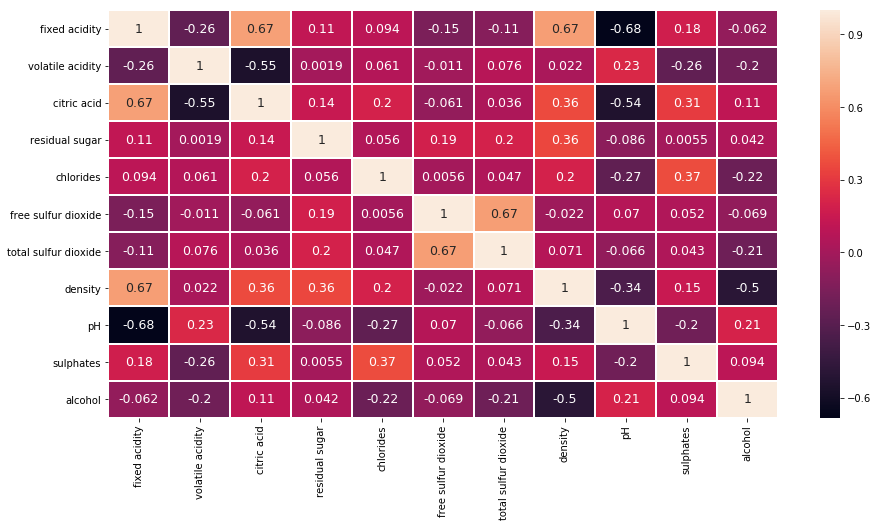

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Get the dataframe without the quality column
sub_data = data.drop(columns='quality', inplace=False)

# Pre-Analysis to determine if there's any correlated features
# Generation correlation matrix 
corrmatrix = sub_data.corr()

# Plot them on seaborn heatmap
fig, ax = plt.subplots(figsize=(15,7.5))         
sns.heatmap(corrmatrix, annot=True, linewidths=1, ax=ax, annot_kws={"size": 12.5})

C:\Users\haimi\Dropbox\Udacity\Final Project\Capstone Project\Submission 2\visuals.py:25: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  axs = pd.scatter_matrix(df, alpha = 0.3, figsize = (15,10), diagonal = 'kde')


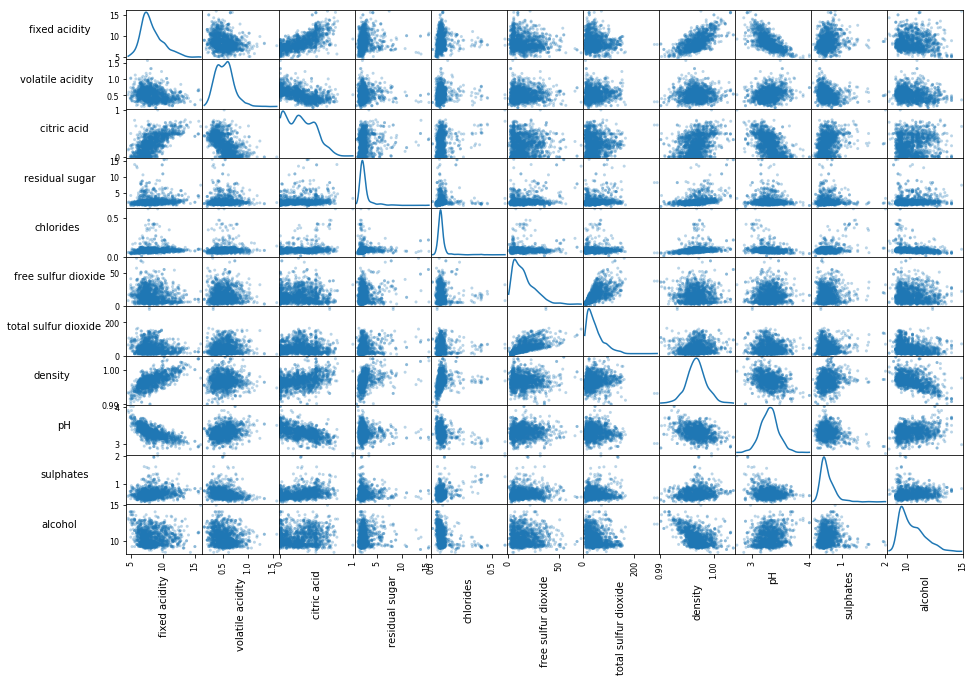

In [6]:
import visuals as vs
# Plot the scatter matrix of data except quality
# Diagonal would provide distribution plot of that selected feature 
# The rest shows the scatter plot of 1 feature against another 
vs.plot_scatter_matrix(sub_data)

## 2. Data Preprocessing 

This section mainly pre-processes the data, via Min-Max Scaling, as well as splitting the entire dataset into training and validation datasets

### 2.1 Min-Max Scaling

In [7]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = list(sub_data.columns)

features_complete = sub_data.copy()
features_complete[numerical] = scaler.fit_transform(features_complete[numerical])

# Show an example of a record with scaling applied
display(features_complete.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


### 2.2 Visualisation of Preprocessed Data

Once Min-Max scaling is performed, the scatter matrix is re-generated for visualisation purposes. Also, pre-processing of the output quality figures would need to be performed to transform it into a binary classification problem

C:\Users\haimi\Dropbox\Udacity\Final Project\Capstone Project\Submission 2\visuals.py:25: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  axs = pd.scatter_matrix(df, alpha = 0.3, figsize = (15,10), diagonal = 'kde')


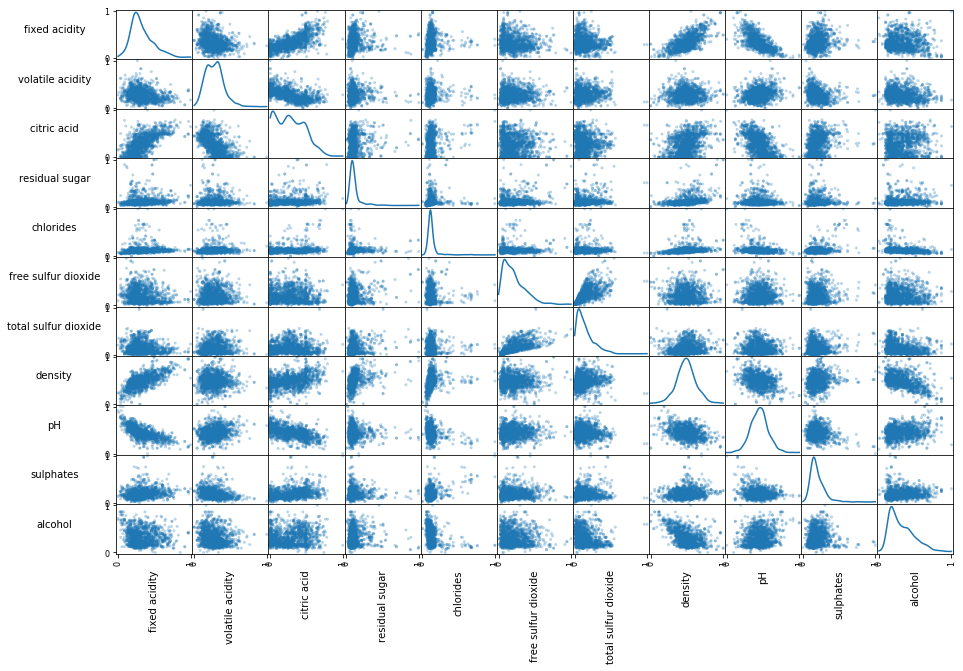

In [8]:
# Plot the scatter matrix of transformed data to min-max scale of 0-1
vs.plot_scatter_matrix(features_complete)

In [9]:
# Get the quality column from the original data dataframe
# A copy is used to prevent the warning with copy error generated
quality_raw = data.copy()[['quality']]

# Convert the quality column to an integer value of 0 or 1, depending on whether the red wine quality figure exceeds 7 or not
quality_raw['quality'] = quality_raw['quality'].apply(lambda x: int(x >= 7))

# Display the first five rows to check if its displayed properly
quality_raw.head()

,quality
0,0
1,0
2,0
3,0
4,0


([<matplotlib.axis.XTick at 0x194c38d7a20>,
 <a list of 2 Text xticklabel objects>)

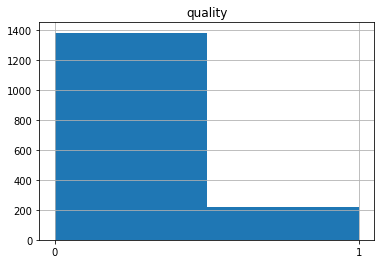

In [10]:
quality_raw.astype('int').hist(column='quality', bins=2)
plt.xlim((-0.05, 1.05))
plt.xticks(np.arange(0, 1.5, step=1))

### 2.3 Splitting into Training & Validation Datasets

A choice of 10% is used, given the limited number of datasets. The training dataset would be used for model training and the testing dataset would be used for validation of trained models to see if the supervised learners can generalise well to out-of-sample datasets

In [11]:
## For the purpose of shuffling and splitting the train_test data
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'quality' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_complete, 
                                                    quality_raw['quality'], 
                                                    test_size = 0.1, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1439 samples.
Testing set has 160 samples.


C:\Users\haimi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 3. Implementation

This section will deal with the implementation of the supervised learners

In [12]:
# Taken from the Udacity's finding_donors project
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.metrics import classification_report, confusion_matrix  

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: quality training set
       - X_test: features testing set
       - y_test: quality testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the training samples which is y_train
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    # Compute F-score on the training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train, predictions_train, beta = 0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)   
   
    # Print the confusion matrix and classification matrix
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    # Get confusion matrix 
    cm = confusion_matrix(y_test, predictions_test)

    cr = classification_report(y_test, predictions_test)      
    
    # Return the results and cm
    return results, cm, cr

### 3.1 Model Evaluation

3 supervised learners would be trained against 1%, 10% and 100% of the training dataset and their performance against the testing dataset is evaluated. The one performing the best would be selected algorithm of choice

In [13]:
## Taken from the Udacity's finding_donors project
# Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize three different models
clf_A = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),random_state = 42)
clf_B = DecisionTreeClassifier(max_depth=4, random_state = 42)
clf_C = GaussianNB()

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = int(y_train.shape[0])
samples_10 = int(0.10*y_train.shape[0])
samples_1 = int(0.01*y_train.shape[0])

# Collect results on the learners
results = {}
# Collect confusion matrix and classification report on the learners
cm = {} 
cr = {}

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    cm[clf_name] = {}
    cr[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        output = train_predict(clf, samples, X_train, y_train, X_test, y_test)
        results[clf_name][i] = output[0]
        cm[clf_name][i] = output[1]
        cr[clf_name][i] = output[2]

AdaBoostClassifier trained on 14 samples.
AdaBoostClassifier trained on 143 samples.
AdaBoostClassifier trained on 1439 samples.
DecisionTreeClassifier trained on 14 samples.
DecisionTreeClassifier trained on 143 samples.
DecisionTreeClassifier trained on 1439 samples.
GaussianNB trained on 14 samples.
GaussianNB trained on 143 samples.
GaussianNB trained on 1439 samples.


#### 3.1.1 Comparison Visualisation - Bar Plot

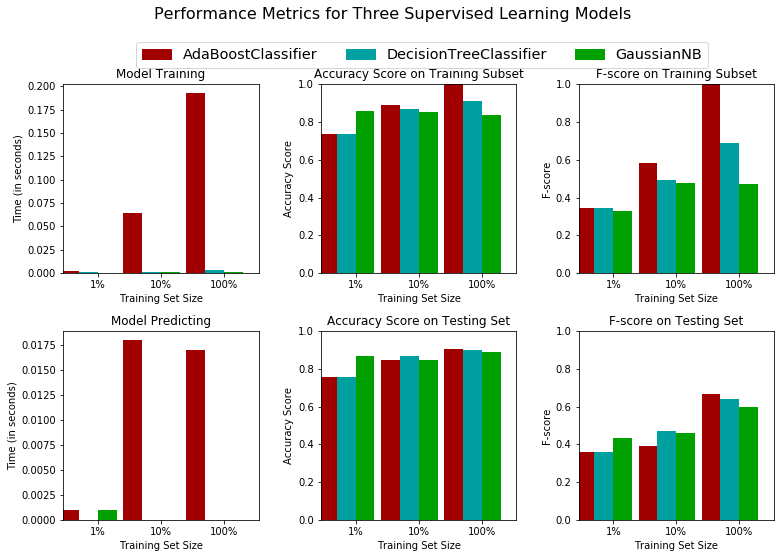

In [14]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results)

#### 3.1.2 Comparison Visualisation - Confusion Matrix

AdaBoostClassifier's Confusion Matrix
---------------------------------------------------------------------------


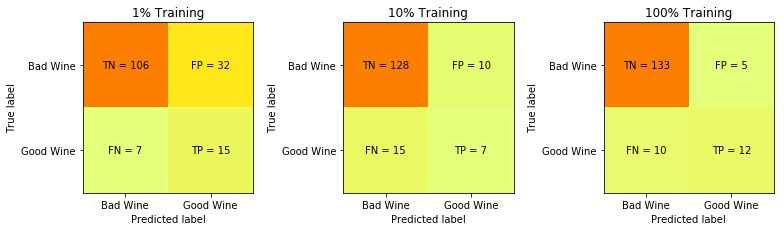

DecisionTreeClassifier's Confusion Matrix
---------------------------------------------------------------------------


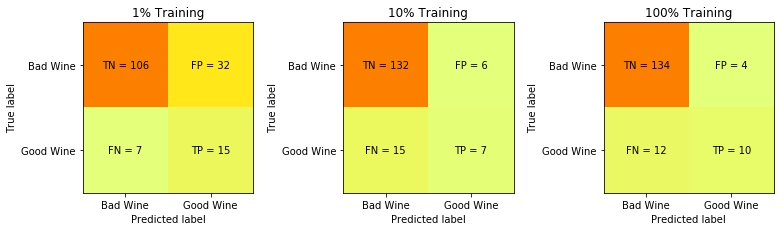

GaussianNB's Confusion Matrix
---------------------------------------------------------------------------


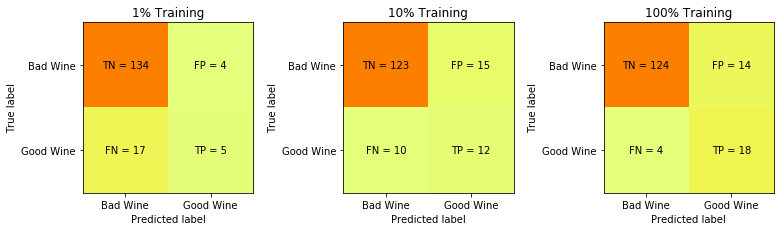

In [15]:
# Print out the confusion matrix for each classifier
for i in cm.items():
    print(i[0]+"'s Confusion Matrix\n---------------------------------------------------------------------------")
    vs.print_cm_mult(i[1], ['1% Training', '10% Training', '100% Training'], ['Bad Wine','Good Wine'], 'Confusion Matrix')

#### 3.1.3 Comparison Visualisation - Classification Report

In [16]:
# Print out the confusion matrix for each classifier
for i in cr.items():
    print('\t'+i[0]+"'s Classification Report Matrix\n------------------------------------------------------------------")
    [print('\t--------- '+k+': ---------\n\n'+i[1][j]) for j,k in enumerate(['1% Training', '10% Training', '100% Training'])]
    print('\n')

	AdaBoostClassifier's Classification Report Matrix
------------------------------------------------------------------
	--------- 1% Training: ---------

             precision    recall  f1-score   support

          0       0.94      0.77      0.84       138
          1       0.32      0.68      0.43        22

avg / total       0.85      0.76      0.79       160

	--------- 10% Training: ---------

             precision    recall  f1-score   support

          0       0.90      0.93      0.91       138
          1       0.41      0.32      0.36        22

avg / total       0.83      0.84      0.84       160

	--------- 100% Training: ---------

             precision    recall  f1-score   support

          0       0.93      0.96      0.95       138
          1       0.71      0.55      0.62        22

avg / total       0.90      0.91      0.90       160



	DecisionTreeClassifier's Classification Report Matrix
------------------------------------------------------------------
	----

#### 3.1.3 Comparison Visualisation - Descriptive Statistics

In [17]:
# Printing out the values
for i in results.items():
    print(i[0]+'\n----------------------------')
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))
    print('\n')

AdaBoostClassifier
----------------------------


,1%,10%,100%
acc_test,0.756250,0.843750,0.906250
acc_train,0.738707,0.890202,1.000000
f_test,0.357143,0.388889,0.666667
f_train,0.347658,0.585034,1.000000
pred_time,0.001000,0.018000,0.016991
train_time,0.001998,0.063963,0.192387




DecisionTreeClassifier
----------------------------


,1%,10%,100%
acc_test,0.756250,0.868750,0.900000
acc_train,0.738707,0.868659,0.913829
f_test,0.357143,0.472973,0.641026
f_train,0.347658,0.495768,0.691937
pred_time,0.000000,0.000000,0.000000
train_time,0.000999,0.001000,0.002999




GaussianNB
----------------------------


,1%,10%,100%
acc_test,0.868750,0.843750,0.887500
acc_train,0.859625,0.851286,0.839472
f_test,0.431034,0.461538,0.600000
f_train,0.329087,0.476815,0.472242
pred_time,0.000999,0.000000,0.000000
train_time,0.000000,0.001009,0.000998


## 4. Refinement

Here, the choice of __AdaBoost algorithm__ would be made. By default, since DecisionTreeClassifier is used for the ensemble methods inherent in AdaBoost, the choice is made to use GridSearchCV to tune the DecisionTreeClassifier alone, then use it to generate a possibilities of different base_estimator to be made for the GridSearchCV within AdaBoostClassifier


### 4.1 Initial Tuning of DecisionTreeClassifier for AdaBoostClassifer

This is primarily to get a rough inkling of hyperparameters estimates for the AdaBoostClassifier's base_estimator of DecisionTreeClassifer within the GridSearchCV itself. Given DecisionTreeClassifier can be visualised with graphviz, the DecisionTree graphviz diagram is generated for visualisation purposes

In [18]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = DecisionTreeClassifier(random_state = 42)

# The first parameter to tune is max_depth. This indicates how deep the tree can be. 
# The deeper the tree, the more splits it has and it captures more information about the data
max_depths = np.linspace(2, 32, 31, endpoint=True).astype('int')

# min_samples_split represents the minimum number of samples required to split an internal node. 
# This can vary between considering at least one sample at each node to considering all of the samples at each node. 
# When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.
min_samples_leaf = np.linspace(1, 4, 4, endpoint=True).astype('int')

# min_samples_leaf is The minimum number of samples required to be at a leaf node. 
# This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples 
# at the leafs, the base of the tree.
min_samples_split = np.linspace(2, 4, 3, endpoint=True).astype('int')

# Create a parameter list for tuning purposes
# parameters = {'max_depth':max_depths, 'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}
parameters = {'max_depth':max_depths, 'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\haimi\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8750
F-score on testing data: 0.5508

Optimized Model
------
Final accuracy score on the testing data: 0.9000
Final F-score on the testing data: 0.6410


In [19]:
# For graphviz library to work in windows environment, should it throw an error in the following block of codes
import os
os.environ['PATH'].split(os.pathsep)
os.environ['PATH'] += os.pathsep + 'C:\\Users\\haimi\\Anaconda3\\Library\\bin\\graphviz'

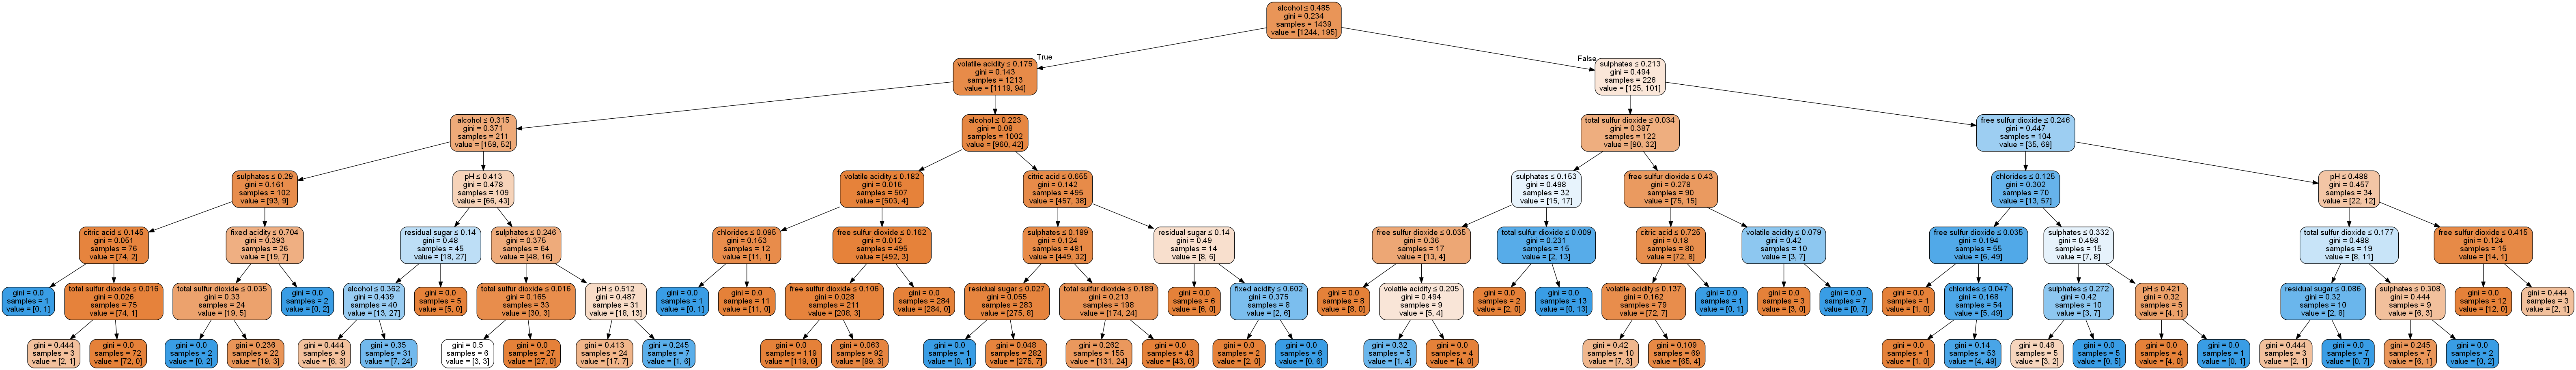

In [20]:
# To display the tuned DecisionTreeClassifier found above, prior to using it for the AdaBoostClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(best_clf, feature_names=X_train.columns.values, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [21]:
# Get the relevant optimal hyper-params tuned from the DecisionTreeClassifier's best_clf found above 
opt_params = best_clf.get_params()

print('\nOptimal Parameters\n'+'-----------------------------------------')
# Print out the relevant params to tune
for key, items in opt_params.items():
    if key in ['max_depth', 'min_samples_leaf', 'min_samples_split']:
        print(key +  ' : ' + str(items))


Optimal Parameters
-----------------------------------------
max_depth : 6
min_samples_leaf : 1
min_samples_split : 4


### 4.2 Tuning of AdaBoostClassifer

Tune the AdaBoost's base_estimator model based on the hyperparameters ranges obtained from Section 4.1 above to achieve higher accuracy and fbeta scores. The corresponding confusion matrix and classification reports are provided here for visualisation purposes

In [22]:
from operator import itemgetter

# Get the optimal DecisionTreeClassifier tuned above
opt_min_samples_leaf, opt_min_samples, opt_max_depth = itemgetter('min_samples_leaf','min_samples_split','max_depth')(opt_params)

# Initialize the classifier
clf = AdaBoostClassifier(random_state=42)

# Permutate the max_depths of DecisionTreeClassifier under AdaBoostClassifier
base_estimator = [DecisionTreeClassifier(max_depth=opt_max_depth+i, random_state=42) for i in np.arange(-3,5,1)]

# Permutate learning rates
learning_rate = [0.8, 0.85, 0.9, 0.95, 1.] 

# Create a parameter list for tuning purposes
# parameters = {'max_depth':max_depths, 'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}
parameters = {'base_estimator': base_estimator, 'learning_rate':learning_rate}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8313
F-score on testing data: 0.2273

Optimized Model
------
Final accuracy score on the testing data: 0.9187
Final F-score on the testing data: 0.7432


#### 4.2.1 Optimal Hyperparameters

In [23]:
best_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=42,
             splitter='best'),
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 10,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': 42,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.85,
 'n_estimators': 50,
 'random_state': 42}

#### 4.2.2 Optimal Confusion Matrix and  Classification Report

The optimal confusion matrix and classification report is generated here for visualisation purposes

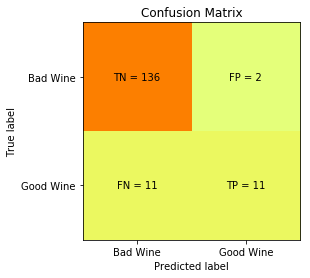

In [24]:
vs.print_cm_single(confusion_matrix(y_test, best_predictions),['Bad Wine','Good Wine'], 'Confusion Matrix')

In [25]:
print('Classification Report\n'+'------------------------------------------------------')
print(classification_report(y_test, best_predictions))

Classification Report
------------------------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.95       138
          1       0.85      0.50      0.63        22

avg / total       0.91      0.92      0.91       160



#### 4.2.3 Validation of Model's Robustness

The optimised AdaBoost model is ran with different random_states to check the "variability" of Accuracy_Score and F-score

In [26]:
# Get optimal parameters found above
opt_p = itemgetter('algorithm','base_estimator','learning_rate','n_estimators')(best_clf.get_params())

# Initialise empty dataframe table
robust_df = pd.DataFrame(columns = ['Random State' , 'Accuracy Score', 'F-score'])

for i in np.arange(26, 63, 4):
    clf_i = AdaBoostClassifier(algorithm=opt_p[0], base_estimator=opt_p[1], learning_rate=opt_p[2], n_estimators=opt_p[3], random_state=i)
    predictions_i = (clf_i.fit(X_train, y_train)).predict(X_test)
    data_i = {'Random State':[i], 'Accuracy Score':[accuracy_score(y_test, predictions_i)], 'F-score':[fbeta_score(y_test, predictions_i, beta = 0.5)]}
    robust_df = pd.concat([robust_df, pd.DataFrame.from_dict(data_i)], ignore_index=True)

display(robust_df)

,Random State,Accuracy Score,F-score
0,26,0.90000,0.641026
1,30,0.90000,0.642857
2,34,0.90000,0.641026
3,38,0.90000,0.639535
4,42,0.91875,0.743243
5,46,0.90000,0.641026
6,50,0.89375,0.608108
7,54,0.90625,0.670732
8,58,0.91250,0.705128
9,62,0.88750,0.571429


### 4.3 Identification of Important Features

Based on the best_clf generated above, the contribution of each features to the determination of features' weights are plotted

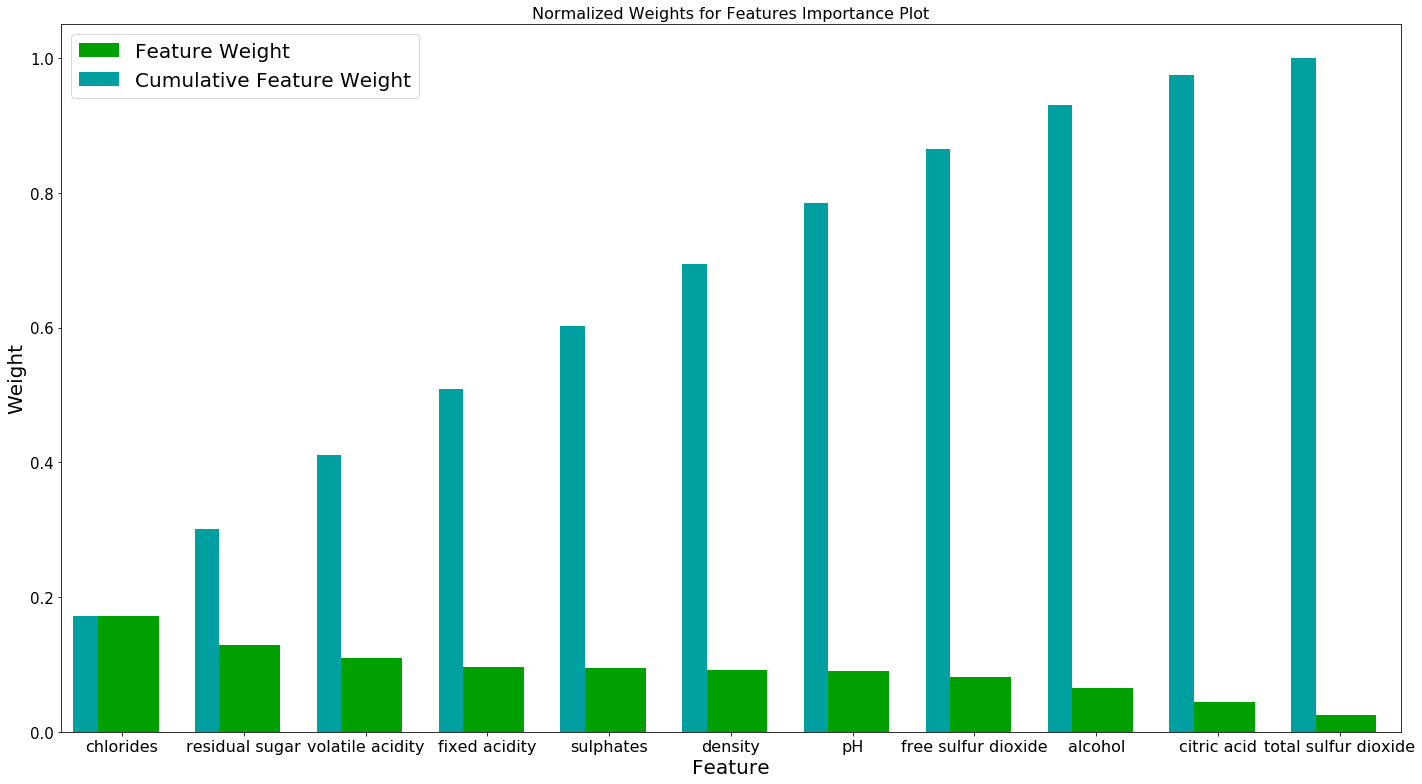

In [27]:
# Using above optimal model to determine the feature_importances_
# Extract the feature importances using .feature_importances_ 
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

## 5 Improvements 

### 5.1 Features Reduction

Given 6 features above nearly accounted for ~75% cumulative weights, the number of chosen features would be reduced to 6 and the optimal best_clf found earlier would be re-trained against this reduced dataset. The impact this reduction have on the model's accuracy and fbeta scores would be computed. The corresponding Confusion Matrices and Classification Reports would be generated and compared side-by-side. Robustness checks would be implemented to evaluate the impact the improvements has on generalisability of data

In [28]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:6]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:6]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------------------------------------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------------------------------------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------------------------------------
Accuracy on testing data: 0.9187
F-score on testing data: 0.7432

Final Model trained on reduced data
------------------------------------
Accuracy on testing data: 0.9313
F-score on testing data: 0.8108


Confusion Matrix
----------------------------------------------------------------------------------------------------------------


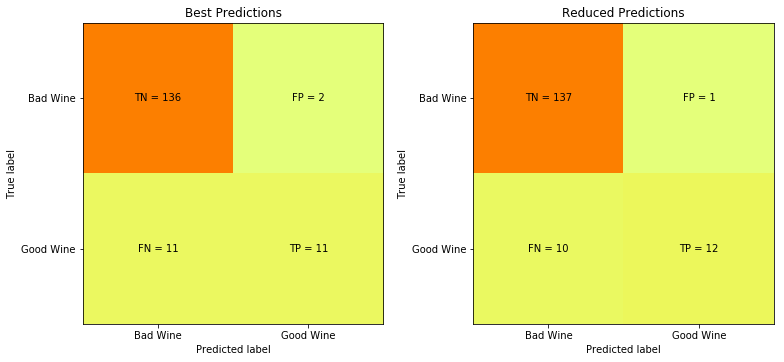

In [29]:
cm = [confusion_matrix(y_test, i) for i in (best_predictions, reduced_predictions)]
print("Confusion Matrix\n----------------------------------------------------------------------------------------------------------------")
vs.print_cm_mult(cm, ['Best Predictions', 'Reduced Predictions'], ['Bad Wine','Good Wine'], 'Confusion Matrix')

In [30]:
for i in [('Best Predictions', best_predictions), ('Reduced Predictions', reduced_predictions)]:
    print('\nClassification Report for '+i[0])
    print('--------------------------------------------------------------------\n')
    print(classification_report(y_test, i[1]))


Classification Report for Best Predictions
--------------------------------------------------------------------

             precision    recall  f1-score   support

          0       0.93      0.99      0.95       138
          1       0.85      0.50      0.63        22

avg / total       0.91      0.92      0.91       160


Classification Report for Reduced Predictions
--------------------------------------------------------------------

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       138
          1       0.92      0.55      0.69        22

avg / total       0.93      0.93      0.92       160



In [31]:
# Get optimal parameters found above
opt_p = itemgetter('algorithm','base_estimator','learning_rate','n_estimators')(best_clf.get_params())

# Initialise empty dataframe table
robust_df = pd.DataFrame(columns = ['Random State' , 'Accuracy Score', 'F-score'])

for i in np.arange(26, 63, 4):
    clf_i = AdaBoostClassifier(algorithm=opt_p[0], base_estimator=opt_p[1], learning_rate=opt_p[2], n_estimators=opt_p[3], random_state=i)
    predictions_i = (clf_i.fit(X_train_reduced, y_train)).predict(X_test_reduced)
    data_i = {'Random State':[i], 'Accuracy Score':[accuracy_score(y_test, predictions_i)], 'F-score':[fbeta_score(y_test, predictions_i, beta = 0.5)]}
    robust_df = pd.concat([robust_df, pd.DataFrame.from_dict(data_i)], ignore_index=True)

display(robust_df)

,Random State,Accuracy Score,F-score
0,26,0.91875,0.757576
1,30,0.92500,0.744681
2,34,0.91250,0.697674
3,38,0.90000,0.639535
4,42,0.93125,0.810811
5,46,0.91875,0.731707
6,50,0.91875,0.731707
7,54,0.91250,0.705128
8,58,0.92500,0.769231
9,62,0.91875,0.743243


### 5.2 PCA

Alternatively, one can utilise PCA to perform dimensionality reduction and train the model on this reduced subset. The resulting accuracy and fbeta figures obtained will be compared against the original best_clf found above and see how PCA fare against it.

In [32]:
from sklearn.decomposition import PCA
from sklearn.base import clone

# Specify n_components to 0.9, ensuring more than 90% of variance is explained
pca = PCA(n_components=0.9, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
clf_pca = (clone(best_clf)).fit(X_train_pca, y_train)
pca_predictions = clf_pca.predict(X_test_pca)

print("\nFinal Model trained on PCA data\n------------------------------------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, pca_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, pca_predictions, beta = 0.5)))


Final Model trained on PCA data
------------------------------------
Accuracy on testing data: 0.9062
F-score on testing data: 0.6818
